<a href="https://colab.research.google.com/github/yusaks83/AntColonyOptimization/blob/master/D4_Data_Cleaning_and_Preparation_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4
# Data Cleaning and Preparation (Part 2/2)

Selama tiga hari kedepan, tujuan kita adalah belajar melakukan data cleaning dan preparation di Python

Untuk hari ini, tujuan kita adalah:
- String manipulation and Handling Typos
- Combine and Merging Dataset
- Outlier detection
- Cleaning dataset Bank Berka
---

In [ ]:
# Library we have learned
import gdown         # Untuk download data dari Google Drive
import pandas as pd  # Untuk load & mengolah tabel/CSV/Excel/Gsheet
import numpy as np   # Numpy Array
import shutil                 # Untuk membuka file .ZIP
from datetime import datetime # Untuk mengolah data tanggal & waktu

# Library baru yang akan dipelajari hari ini
import pickle

# Loading the Data From Pickle

We will continue the data cleaning action from previous day. Here's the actions left to do.

| Temuan | Plan of Action |
|---|---|
| Data nama merchant masih digabung dengan nama penerima pembayaran <br/> (_payment gateway_): DOKU, MID(TRANS), CASHLEZ | Pisahkan nama merchant dengan nama _payment gateway_-nya |
| TOKOPAEDI typo seharusnya TOKOPEDIA | Ganti ke TOKOPEDIA  |
| TOKTOKLIVE dan TIKTOKSHOP bisa digabungkan menjadi TIKTOK | Ganti ke TIKTOK |


We will open the the pickle file from the previous day and continue our data cleaning

Link download: https://drive.google.com/file/d/1bcLhBQpEr5nDoMt6eF2QY0Lw0BGB5ZXs/view?usp=sharing


In [ ]:
url = "https://drive.google.com/file/d/1bcLhBQpEr5nDoMt6eF2QY0Lw0BGB5ZXs/view?usp=sharing"
output = 'data_cleaning.pkl'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1bcLhBQpEr5nDoMt6eF2QY0Lw0BGB5ZXs
To: /content/data_cleaning.pkl
100%|██████████| 1.67k/1.67k [00:00<00:00, 1.02MB/s]


'data_cleaning.pkl'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/data_cleaning.pkl','rb') as f:
  df = pickle.load(f)

In [ ]:
df

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264105,N,SETTLED
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602871,N,SETTLED
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-1,Y,CANCELED
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343124,N,SETTLED
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,21694335,Y,SETTLED
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 7
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TRANSACTION_ID    7 non-null      object        
 1   CLIENT_ID         7 non-null      object        
 2   TRANSACTION_DATE  7 non-null      datetime64[ns]
 3   SETTLEMENT_DATE   7 non-null      datetime64[ns]
 4   MERCHANT_NAME     7 non-null      object        
 5   TXN_AMT           7 non-null      int64         
 6   CARD_PRESENT      7 non-null      object        
 7   STATUS            7 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 504.0+ bytes


# Data Cleaning (Part 2)

## String Manipulation and Handling Typo

In [ ]:
# We need to split the Merchant Name by space
df['MERCHANT_NAME'].str.split(" ", expand=True)

,0,1
1,MID,TOKOPEDIA
2,MID,TOKOPEDIA
3,DOKU,TIKTOKLIVE
4,DOKU,TIKTOKSHOP
5,MID,TOKOPAEDI
6,CASHLEZ,MATAHARI
7,DOKU,TIKTOKSHOP


In [ ]:
# We need to split the Merchant Name by space
df['MERCHANT_NAME'].str.split("T", expand=True)

,0,1,2
1,MID,OKOPEDIA,None
2,MID,OKOPEDIA,None
3,DOKU,IK,OKLIVE
4,DOKU,IK,OKSHOP
5,MID,OKOPAEDI,None
6,CASHLEZ MA,AHARI,None
7,DOKU,IK,OKSHOP


In [ ]:
df[['PAYMENT_GATEWAY','MERCHANT']] = df['MERCHANT_NAME'].str.split(" ", expand=True)
df

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264105,N,SETTLED,MID,TOKOPEDIA
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602871,N,SETTLED,MID,TOKOPEDIA
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-1,Y,CANCELED,DOKU,TIKTOKLIVE
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOKSHOP
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343124,N,SETTLED,MID,TOKOPAEDI
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,21694335,Y,SETTLED,CASHLEZ,MATAHARI
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOKSHOP


In [ ]:
df['MERCHANT'].value_counts()

TOKOPEDIA     2
TIKTOKSHOP    2
TIKTOKLIVE    1
TOKOPAEDI     1
MATAHARI      1
Name: MERCHANT, dtype: int64

In [ ]:
# We can find all merchant that contains "TIKTOK"
df['MERCHANT'].str.find('TIKTOK')

1   -1
2   -1
3    0
4    0
5   -1
6   -1
7    0
Name: MERCHANT, dtype: int64

In [ ]:
# We can use this information to assign a new merchant
df.loc[
    (df['MERCHANT'].str.find('TIKTOK') >= 0)
    , 'MERCHANT'
] = 'TIKTOK'
df

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264105,N,SETTLED,MID,TOKOPEDIA
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602871,N,SETTLED,MID,TOKOPEDIA
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-1,Y,CANCELED,DOKU,TIKTOK
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343124,N,SETTLED,MID,TOKOPAEDI
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,21694335,Y,SETTLED,CASHLEZ,MATAHARI
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK


In [ ]:
# One final cosmetic things: Let's replace the MERCHANT with
df['MERCHANT'] = df['MERCHANT'].replace("TOKOPAEDI","TOKOPEDIA")

In [ ]:
df

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264105,N,SETTLED,MID,TOKOPEDIA
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602871,N,SETTLED,MID,TOKOPEDIA
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-1,Y,CANCELED,DOKU,TIKTOK
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343124,N,SETTLED,MID,TOKOPEDIA
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,21694335,Y,SETTLED,CASHLEZ,MATAHARI
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK


## Combine and Merging Dataset

We will combine df with MCC (Merchant Category Code) data, that can be downloaded here:

https://docs.google.com/spreadsheets/d/16Aiq0evwwTHGYDrtCIJD2nceGnKMF0kUQjP64TkYkMU/edit#gid=0

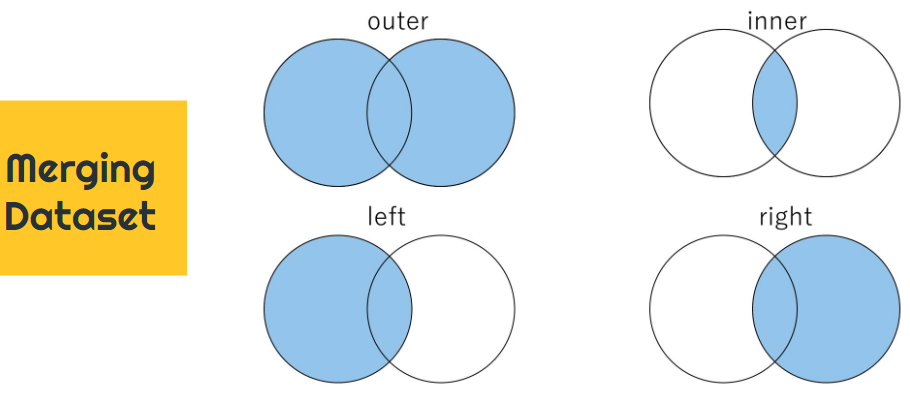

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/16Aiq0evwwTHGYDrtCIJD2nceGnKMF0kUQjP64TkYkMU/edit#gid=0'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
mcc = pd.read_csv(GSHEET_URL_CSV)
mcc

,STANDARDIZED_MERCHANT,MERCHANT_CATEGORY
0,TIKTOK,MARKETPLACES
1,TOKOPEDIA,MARKETPLACES
2,MATAHARI,APPAREL
3,UNIQLO,APPAREL


In [ ]:
# We can use merge datasets using .merge()
df.merge(mcc, how='left', left_on = 'MERCHANT', right_on = 'STANDARDIZED_MERCHANT')

#select * from df left join mcc on df.MERCHANT = mcc.STANDARDIZED_MERCHANT

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT,STANDARDIZED_MERCHANT,MERCHANT_CATEGORY
0,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264105,N,SETTLED,MID,TOKOPEDIA,TOKOPEDIA,MARKETPLACES
1,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602871,N,SETTLED,MID,TOKOPEDIA,TOKOPEDIA,MARKETPLACES
2,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-1,Y,CANCELED,DOKU,TIKTOK,TIKTOK,MARKETPLACES
3,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK,TIKTOK,MARKETPLACES
4,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343124,N,SETTLED,MID,TOKOPEDIA,TOKOPEDIA,MARKETPLACES
5,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,21694335,Y,SETTLED,CASHLEZ,MATAHARI,MATAHARI,APPAREL
6,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582188,N,SETTLED,DOKU,TIKTOK,TIKTOK,MARKETPLACES


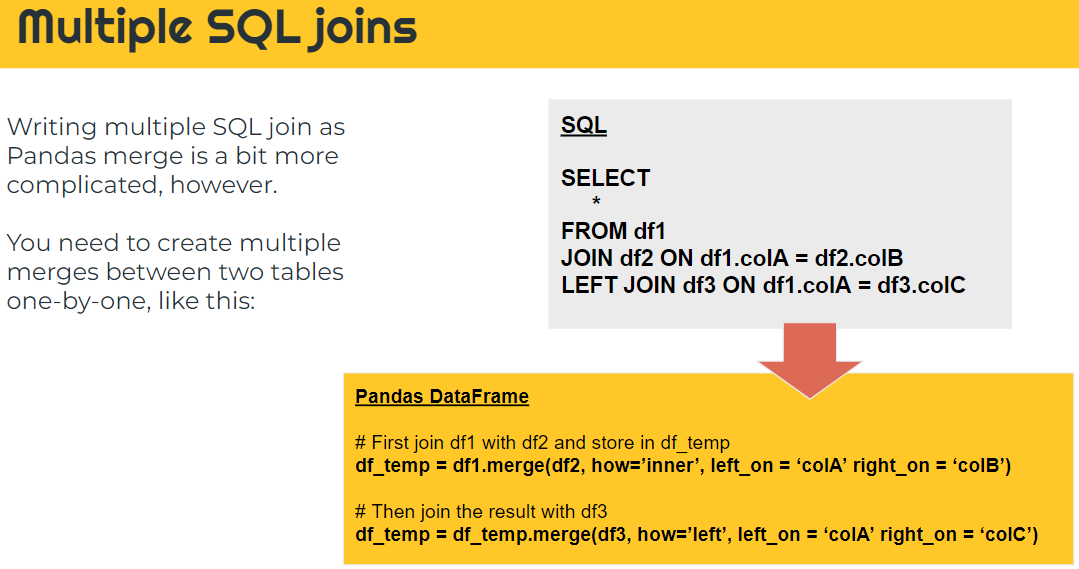

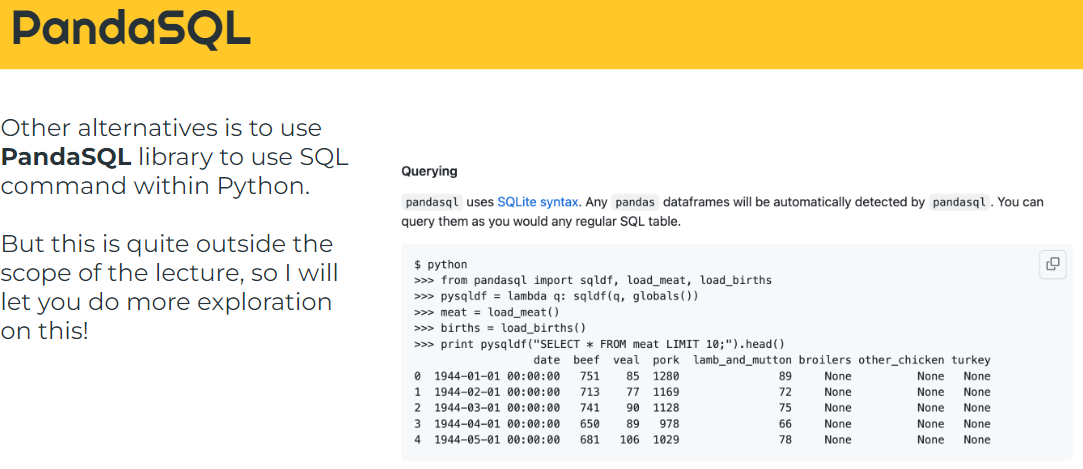

## Outlier Detection



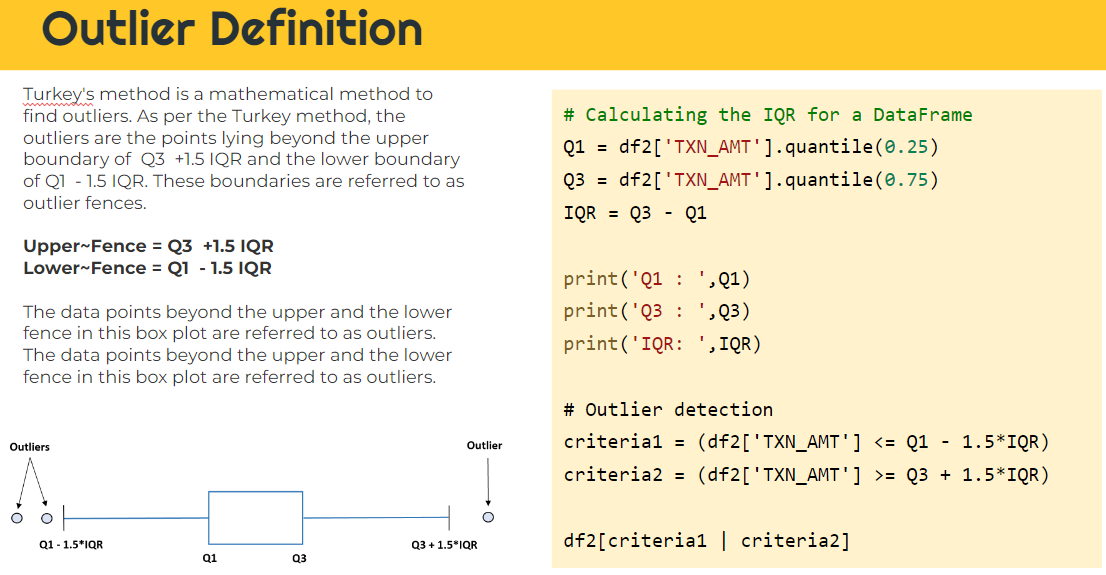

In [ ]:
# For this demo, let's change the data a little bit.
df2 = df.copy()
df2.loc[df2['TXN_AMT'] > 0,'TXN_AMT'] = df2['TXN_AMT']/1e3
df2.loc[df2['TRANSACTION_ID'] == '999AX203', 'TXN_AMT'] = 50453.21
df2.loc[df2['TRANSACTION_ID'] == '999AX202', 'TXN_AMT'] = -20000
df2

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264.105,N,SETTLED,MID,TOKOPEDIA
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602.871,N,SETTLED,MID,TOKOPEDIA
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-20000.000,Y,CANCELED,DOKU,TIKTOK
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582.188,N,SETTLED,DOKU,TIKTOK
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343.124,N,SETTLED,MID,TOKOPEDIA
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,50453.210,Y,SETTLED,CASHLEZ,MATAHARI
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582.188,N,SETTLED,DOKU,TIKTOK


In [ ]:
# Calculating the IQR for a DataFrame
Q1 = df2['TXN_AMT'].quantile(0.25)
Q3 = df2['TXN_AMT'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 : ',Q1)
print('Q3 : ',Q3)
print('IQR: ',IQR)

Q1 :  2972.9975
Q3 :  13423.146499999999
IQR:  10450.149


<Axes: >

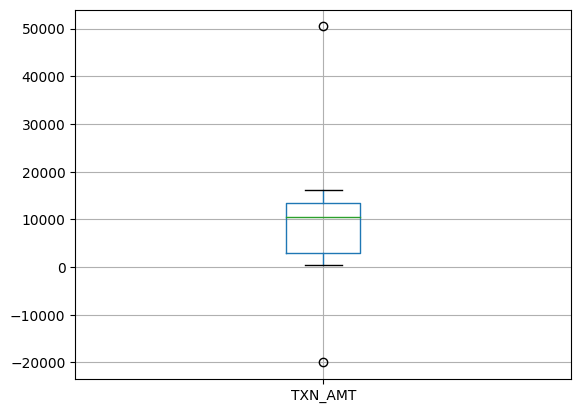

In [ ]:
df2[['TXN_AMT']].boxplot()

In [ ]:
# Outlier detection
criteria1 = (df2['TXN_AMT'] <= Q1 - 1.5*IQR)
criteria2 = (df2['TXN_AMT'] >= Q3 + 1.5*IQR)

df2[
    criteria1 | criteria2
]

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
3,999AX202,2543,2021-10-15,2021-10-22,DOKU TIKTOKLIVE,-20000.00,Y,CANCELED,DOKU,TIKTOK
6,999AX203,2542,2022-01-17,2022-01-20,CASHLEZ MATAHARI,50453.21,Y,SETTLED,CASHLEZ,MATAHARI


## In-Class Exercise 1

Remove the data that contains outlier.

In [ ]:
df3 = df2[ ~(criteria1|criteria2) ]
df3

,TRANSACTION_ID,CLIENT_ID,TRANSACTION_DATE,SETTLEMENT_DATE,MERCHANT_NAME,TXN_AMT,CARD_PRESENT,STATUS,PAYMENT_GATEWAY,MERCHANT
1,999AY202,2541,2021-09-14,2021-09-17,MID TOKOPEDIA,16264.105,N,SETTLED,MID,TOKOPEDIA
2,999AZ203,2542,2021-10-15,2021-10-22,MID TOKOPEDIA,5602.871,N,SETTLED,MID,TOKOPEDIA
4,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582.188,N,SETTLED,DOKU,TIKTOK
5,999AZ204,2541,2021-12-16,2021-12-21,MID TOKOPAEDI,343.124,N,SETTLED,MID,TOKOPEDIA
7,999AY203,2544,2021-11-16,2021-11-19,DOKU TIKTOKSHOP,10582.188,N,SETTLED,DOKU,TIKTOK


<Axes: >

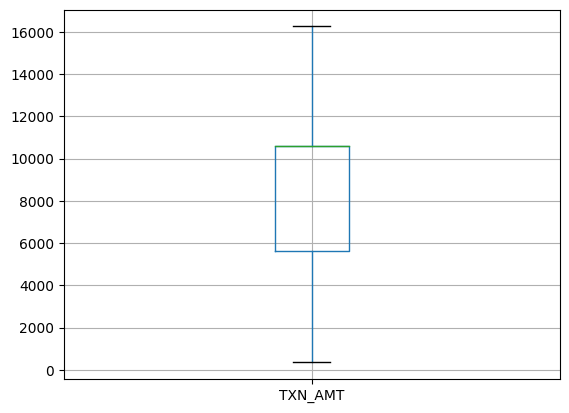

In [ ]:
df3[['TXN_AMT']].boxplot()

# In-Class Exercise 2: Dataset Bank Berka

Dataset Bank Berka adalah kumpulan data mengenai suatu bank dari Ceko. Format file-nya adalah ZIP file, yang akan kita ekstrak, lalu load dengan menggunakan Pandas.

Link download: https://drive.google.com/file/d/1oDWHBrn7j0dpOKmIUkYNAEtV87HGco2J/view?usp=drive_link

Data dictionary: https://docs.google.com/spreadsheets/d/1U7K1azrdgwxd8WTZoFdSakED7LZiVvlVCYxZcq4ZV2A/edit#gid=1332887184

Setelah terdownload, unzip file tersebut dengan menggunakan function `unpack_archive` dari library `shutil`

```
import shutil
shutil.unpack_archive(filename)
```

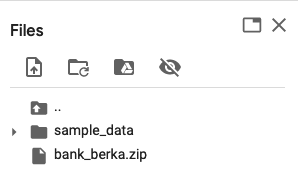

In [ ]:
url = "https://drive.google.com/file/d/1oDWHBrn7j0dpOKmIUkYNAEtV87HGco2J/view?usp=drive_link"
output = "bank_berka.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1oDWHBrn7j0dpOKmIUkYNAEtV87HGco2J
To: /content/bank_berka.zip
100%|██████████| 18.6M/18.6M [00:00<00:00, 24.9MB/s]


'bank_berka.zip'

In [ ]:
shutil.unpack_archive('/content/bank_berka.zip')

Semua file tersebut akan masuk dalam 1 folder, `'/content/'`.

Mari kita ubah dataset yang ada menjadi DataFrame

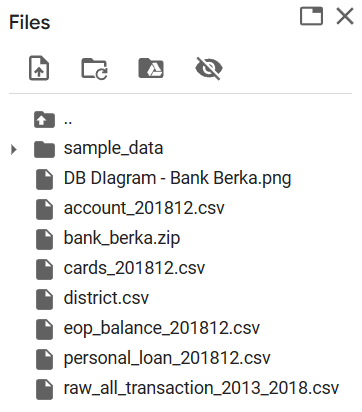

## Load Bank Berka datasets

In [ ]:
# Read account tables
account = pd.read_csv('/content/account_201812.csv')
account

,account_id,client_id,gender,birth_date,acct_district_id,acct_opening_dt,statement_frequency
0,576,999692,F,19560111,55,130101,MONTHLY STATEMENT
1,3818,994601,M,19550402,74,130101,MONTHLY STATEMENT
2,704,999844,M,19650114,55,130101,MONTHLY STATEMENT
3,2378,992873,F,19950324,16,130101,MONTHLY STATEMENT
4,2632,993177,M,19580812,24,130102,MONTHLY STATEMENT
...,...,...,...,...,...,...,...
4496,124,999149,M,19680627,55,171228,MONTHLY STATEMENT
4497,3958,994774,M,19710814,59,171228,MONTHLY STATEMENT
4498,777,999929,F,19710911,30,171228,MONTHLY STATEMENT
4499,1573,991906,M,19420707,63,171229,MONTHLY STATEMENT


In [ ]:
cards = pd.read_csv('/content/cards_201812.csv')
cards

,client_id,card_type,issued
0,999999,gold,2018-10-16
1,999919,classic,2018-03-13
2,999941,gold,2015-09-03
3,999942,classic,2018-11-26
4,999951,junior,2015-04-24
...,...,...,...
884,913620,classic,2018-03-08
885,913690,classic,2016-07-06
886,913694,classic,2017-11-28
887,913750,junior,2018-02-02


In [ ]:
district = pd.read_csv('/content/district.csv')
district

,district_id,district_name,region
0,1,Hl.m. Praha,Prague
1,2,Benesov,central Bohemia
2,3,Beroun,central Bohemia
3,4,Kladno,central Bohemia
4,5,Kolin,central Bohemia
...,...,...,...
72,73,Opava,north Moravia
73,74,Ostrava - mesto,north Moravia
74,75,Prerov,north Moravia
75,76,Sumperk,north Moravia


In [ ]:
balance = pd.read_csv('/content/eop_balance_201812.csv')
balance

,account_id,date,balance
0,1,2015-03-31,1000.0
1,1,2015-04-30,17298.2
2,1,2015-05-31,23156.2
3,1,2015-06-30,26735.8
4,1,2015-07-31,25223.7
...,...,...,...
185052,11382,2018-08-31,36854.4
185053,11382,2018-09-30,55145.2
185054,11382,2018-10-31,54378.2
185055,11382,2018-11-30,66714.7


In [ ]:
loan = pd.read_csv('/content/personal_loan_201812.csv')
loan

,loan_id,client_id,date,principal,duration_month,annual_interest_rate,monthly_payment,total_payment,status
0,888885314,992166,130705,88833.0,12,0.153592,8033.0,96396,B
1,888885316,992181,130711,141131.0,36,0.108437,4610.0,165960,A
2,888886863,911314,130728,94126.0,60,0.125077,2118.0,127080,A
3,888885325,992235,130803,73372.0,36,0.255593,2939.0,105804,A
4,888887240,913539,130906,239184.0,60,0.055932,4579.0,274740,A
...,...,...,...,...,...,...,...,...,...
677,888884989,999127,181205,313373.0,48,0.059194,7348.0,352704,C
678,888885221,991554,181205,49835.0,12,0.097703,4376.0,52512,C
679,888886402,998356,181206,117780.0,24,0.168004,5812.0,139488,C
680,888885346,992342,181206,48539.0,24,0.134537,2318.0,55632,C


In [ ]:
transaction = pd.read_csv('/content/raw_all_transaction_2013_2018.csv', low_memory=True)
transaction

<ipython-input-47-7d476a6600ce>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction = pd.read_csv('/content/raw_all_transaction_2013_2018.csv', low_memory=True)


,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
0,695247,2378,130101,CREDIT,700.0,700.0,CREDIT IN CASH,NaN
1,171812,576,130101,CREDIT,900.0,900.0,CREDIT IN CASH,NaN
2,207264,704,130101,CREDIT,1000.0,1000.0,CREDIT IN CASH,NaN
3,1117247,3818,130101,CREDIT,600.0,600.0,CREDIT IN CASH,NaN
4,579373,1972,130102,CREDIT,400.0,400.0,CREDIT IN CASH,NaN
...,...,...,...,...,...,...,...,...
1056315,3626622,2906,181231,CREDIT,62.3,13729.4,INTEREST,NaN
1056316,3627616,2935,181231,CREDIT,81.3,19544.9,INTEREST,NaN
1056317,3625403,2869,181231,CREDIT,60.2,14638.3,INTEREST,NaN
1056318,3626683,2907,181231,CREDIT,107.5,23453.6,INTEREST,NaN


For easiness, you can assume the only `account` and `transactions` data needs to be cleaned.

Let's do `account` today and `transactions` tomorrow. **bold text**

## Cleaning `transactions` dataset

Do data cleaning for `transactions`. Ensure:
- All dates in correct format
- Remove any duplicates
- Handle any missing values
- Check for any typos in the data (compare against data dictionary)

Data dictionary: https://docs.google.com/spreadsheets/d/1U7K1azrdgwxd8WTZoFdSakED7LZiVvlVCYxZcq4ZV2A/edit#gid=1332887184



In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   trans_id          1056320 non-null  int64  
 1   account_id        1056320 non-null  int64  
 2   date              1056320 non-null  int64  
 3   type              1056320 non-null  object 
 4   trans_amt         1056320 non-null  float64
 5   balance_after     1056320 non-null  float64
 6   transaction_note  1056320 non-null  object 
 7   bank              259929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 64.5+ MB


## Head/Tail

Pertama, lihat datasetnya dengan menggunakan `df.head()` atau `df.tail()`

Issue:
- date bukan dalam type datetime

In [ ]:
transaction.head()

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
0,695247,2378,130101,CREDIT,700.0,700.0,CREDIT IN CASH,NaN
1,171812,576,130101,CREDIT,900.0,900.0,CREDIT IN CASH,NaN
2,207264,704,130101,CREDIT,1000.0,1000.0,CREDIT IN CASH,NaN
3,1117247,3818,130101,CREDIT,600.0,600.0,CREDIT IN CASH,NaN
4,579373,1972,130102,CREDIT,400.0,400.0,CREDIT IN CASH,NaN


In [ ]:
transaction.tail()

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
1056315,3626622,2906,181231,CREDIT,62.3,13729.4,INTEREST,NaN
1056316,3627616,2935,181231,CREDIT,81.3,19544.9,INTEREST,NaN
1056317,3625403,2869,181231,CREDIT,60.2,14638.3,INTEREST,NaN
1056318,3626683,2907,181231,CREDIT,107.5,23453.6,INTEREST,NaN
1056319,3626540,2902,181231,CREDIT,164.1,41643.4,INTEREST,NaN


## Info & Missing Value

Cek `df.info()`

- The bank information seems missing

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   trans_id          1056320 non-null  int64  
 1   account_id        1056320 non-null  int64  
 2   date              1056320 non-null  int64  
 3   type              1056320 non-null  object 
 4   trans_amt         1056320 non-null  float64
 5   balance_after     1056320 non-null  float64
 6   transaction_note  1056320 non-null  object 
 7   bank              259929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 64.5+ MB


## Unique Values

Kita ingin melihat nilai unik & frekuensi yang ada di setiap kolom dan mencocokannya dengan Data Dictionary

Jika ada yang tidak cocok, maka itu potensi Typo yang harus diperbaiki.

Kita bisa memanfaatkan `df[col].value_counts()` untuk semua `col` di `df`

In [ ]:
col = ['type','transaction_note']
print(transaction[col].value_counts())
print('\n') # Kasih 1 new line (enter)

#select type, transaction_note, count(*) from transaction group by type, transaction_note

type    transaction_note                                  
DEBIT   WITHDRAWAL IN CASH                                    257393
CREDIT  INTEREST                                              183114
        CREDIT IN CASH                                        156743
DEBIT   WITHDRAWAL IN CASH|STATEMENT FEE                      155832
        REMITTANCE TO OTHER BANK|UTILITIES PAYMENT by SIPO    115254
        REMITTANCE TO OTHER BANK|                              52817
CREDIT  INCOMING FROM OTHER BANK                               34888
        INCOMING FROM OTHER BANK|PENSION                       30338
DEBIT   REMITTANCE TO OTHER BANK|INSURANCE PAYMENT             18477
VYBER   WITHDRAWAL IN CASH                                     16666
DEBIT   WITHDRAWAL IN CASH|LOAN PAYMENT                        13580
        REMITTANCE TO OTHER BANK                                8155
        CARD TRANSACTIONS                                       8036
        WITHDRAWAL IN CASH|UTILITIES PAYMENT

In [ ]:
# Melihat nilai unik dari setiap kolom
# Periksa yang frekuensinya lebih dari 1 atau yang nilainya tidak sesuai dengan Data Dictionary
for col in transaction.columns:
  print(col)
  print(transaction[col].value_counts())
  print('\n') # Kasih 1 new line (enter)

trans_id
695247     1
3668623    1
3668223    1
3667245    1
3672005    1
          ..
157197     1
165365     1
165644     1
1001088    1
3626540    1
Name: trans_id, Length: 1056320, dtype: int64


account_id
8261    675
3834    665
96      661
2932    655
9307    649
       ... 
758      12
1563     12
727      11
315      11
182       9
Name: account_id, Length: 4500, dtype: int64


date
180630    9269
180930    9249
180731    9223
180831    9222
181031    9218
          ... 
130102       2
130317       2
130201       2
130115       2
130116       1
Name: date, Length: 2191, dtype: int64


type
DEBIT     634571
CREDIT    405083
VYBER      16666
Name: type, dtype: int64


trans_amt
14.6       144098
30.0         8495
100.0        5082
1200.0       4710
1800.0       4705
            ...  
2837.0          1
32650.0         1
31306.0         1
21221.0         1
449.5           1
Name: trans_amt, Length: 40400, dtype: int64


balance_after
900.0      492
1100.0     490
600.0      472
20

Here we can see several issues:
- transaction type: ada VYBER
- transaction_note ada yang transaction purpose, ada yang tidak --> need to separate first before can decide anything

## Duplicated value

Kita bisa mencari nilai duplikat dengan:
- `df[df.duplicated()]` untuk melihat baris yang nilainya berulang (jika ada)
- `df[df[col].duplicated()]` untuk melihat baris yang nilai `col`-nya berulang

In [ ]:
# Tidak ada baris yang berulang
transaction[transaction.duplicated()]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank


In [ ]:
# Cek ID untuk memeriksa apakah ada yang duplikat atau tidak
# Tidak ada account ID yang duplikat
transaction[transaction['trans_id'].duplicated()]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank


In [ ]:
# Cek ID untuk memeriksa apakah ada yang duplikat atau tidak
# Banyak account_id yang duplikat, tapi sangat wajar dalam tabel transaksi
transaction[transaction['account_id'].duplicated()]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
15,637742,2177,130105,CREDIT,5123.0,5923.0,INCOMING FROM OTHER BANK|PENSION,YZ
17,232961,793,130105,CREDIT,3401.0,4201.0,INCOMING FROM OTHER BANK,IJ
21,542216,1844,130107,CREDIT,3242.0,3742.0,INCOMING FROM OTHER BANK,ST
24,579374,1972,130107,CREDIT,5298.0,5698.0,INCOMING FROM OTHER BANK|PENSION,UV
27,374590,1276,130108,CREDIT,6774.0,7174.0,CREDIT IN CASH,NaN
...,...,...,...,...,...,...,...,...
1056315,3626622,2906,181231,CREDIT,62.3,13729.4,INTEREST,NaN
1056316,3627616,2935,181231,CREDIT,81.3,19544.9,INTEREST,NaN
1056317,3625403,2869,181231,CREDIT,60.2,14638.3,INTEREST,NaN
1056318,3626683,2907,181231,CREDIT,107.5,23453.6,INTEREST,NaN


## Summary of issues
- `date` bukan dalam format datetime
- The bank information seems missing
- transaction_note ada yang transaction purpose, ada yang tidak --> need to separate first before can decide anything
- transaction type: ada VYBER


## Data Cleaning

### Datetime type

In [ ]:
transaction2 = transaction.copy()
transaction2

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
0,695247,2378,130101,CREDIT,700.0,700.0,CREDIT IN CASH,NaN
1,171812,576,130101,CREDIT,900.0,900.0,CREDIT IN CASH,NaN
2,207264,704,130101,CREDIT,1000.0,1000.0,CREDIT IN CASH,NaN
3,1117247,3818,130101,CREDIT,600.0,600.0,CREDIT IN CASH,NaN
4,579373,1972,130102,CREDIT,400.0,400.0,CREDIT IN CASH,NaN
...,...,...,...,...,...,...,...,...
1056315,3626622,2906,181231,CREDIT,62.3,13729.4,INTEREST,NaN
1056316,3627616,2935,181231,CREDIT,81.3,19544.9,INTEREST,NaN
1056317,3625403,2869,181231,CREDIT,60.2,14638.3,INTEREST,NaN
1056318,3626683,2907,181231,CREDIT,107.5,23453.6,INTEREST,NaN


In [ ]:
transaction2['date'] = pd.to_datetime(transaction2['date'], format = '%y%m%d')
transaction2

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,NaN
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,NaN
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,NaN
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,NaN
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,NaN
...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,NaN
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,NaN
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,NaN
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,NaN


In [ ]:
transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              259929 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 64.5+ MB


### Missing Values: bank information

From the data dictionary:
"Other bank has unique two-letter code; transaction to/from the Bank Berka does not marked"

Hence we can fill any missing value with Bank Berka code.

To distinguish it from other banks, let's have 3-digit code for it: BRK

In [ ]:
transaction2['bank'] = transaction2['bank'].fillna('BRK')
transaction2

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,BRK
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,BRK
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,BRK
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,BRK
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,BRK
...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,BRK
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,BRK
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,BRK
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,BRK


In [ ]:
transaction2['bank'].value_counts()

BRK    796391
QR      21075
ST      20874
AB      20589
EF      20364
GH      20324
YZ      20311
KL      20262
OP      20103
UV      19962
IJ      19864
WX      19164
CD      18682
MN      18355
Name: bank, dtype: int64

In [ ]:
transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 64.5+ MB


### Transaction Note: String manipulation
We need two step process to understand the data:
- Split the credit/debit information and transaction purpose
- See if we can fill in any missing information

In [ ]:
transaction2['transaction_note'].value_counts()

WITHDRAWAL IN CASH                                    274059
INTEREST                                              183114
CREDIT IN CASH                                        156743
WITHDRAWAL IN CASH|STATEMENT FEE                      155832
REMITTANCE TO OTHER BANK|UTILITIES PAYMENT by SIPO    115254
REMITTANCE TO OTHER BANK|                              52817
INCOMING FROM OTHER BANK                               34888
INCOMING FROM OTHER BANK|PENSION                       30338
REMITTANCE TO OTHER BANK|INSURANCE PAYMENT             18477
WITHDRAWAL IN CASH|LOAN PAYMENT                        13580
REMITTANCE TO OTHER BANK                                8155
CARD TRANSACTIONS                                       8036
WITHDRAWAL IN CASH|UTILITIES PAYMENT by SIPO            2811
WITHDRAWAL IN CASH|OVERDRAFT FEE                        1577
WITHDRAWAL IN CASH|                                      616
WITHDRAWAL IN CASH|INSURANCE PAYMENT                      23
Name: transaction_note, 

In [ ]:
# First, we find transaction_note with the pipe ("|")
# We can search for the pipe using df[col].str.find("|")
# -1: Not found
# Any value > 0: Found
transaction2['transaction_note'].str.find('|') > 0

0          False
1          False
2          False
3          False
4          False
           ...  
1056315    False
1056316    False
1056317    False
1056318    False
1056319    False
Name: transaction_note, Length: 1056320, dtype: bool

In [ ]:
transaction2[
    transaction2['transaction_note'].str.find('|') > 0
]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
15,637742,2177,2013-01-05,CREDIT,5123.0,5923.0,INCOMING FROM OTHER BANK|PENSION,YZ
24,579374,1972,2013-01-07,CREDIT,5298.0,5698.0,INCOMING FROM OTHER BANK|PENSION,UV
46,1049882,3592,2013-01-10,CREDIT,6007.0,6607.0,INCOMING FROM OTHER BANK|PENSION,MN
49,171813,576,2013-01-11,CREDIT,6207.0,7107.0,INCOMING FROM OTHER BANK|PENSION,YZ
53,689828,2357,2013-01-12,CREDIT,6434.0,7234.0,INCOMING FROM OTHER BANK|PENSION,OP
...,...,...,...,...,...,...,...,...
1055233,3607597,2346,2018-12-31,DEBIT,14.9,-2236.1,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK
1055579,3668638,5066,2018-12-31,DEBIT,3.5,59668.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK
1055639,3489430,7520,2018-12-31,DEBIT,67.2,-11020.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK
1055676,3488804,7465,2018-12-31,DEBIT,0.8,84975.0,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK


In [ ]:
# Let's just take an example
ex = transaction2[
    transaction2['transaction_note'] == 'INCOMING FROM OTHER BANK|PENSION'
].copy()
ex

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank
15,637742,2177,2013-01-05,CREDIT,5123.0,5923.0,INCOMING FROM OTHER BANK|PENSION,YZ
24,579374,1972,2013-01-07,CREDIT,5298.0,5698.0,INCOMING FROM OTHER BANK|PENSION,UV
46,1049882,3592,2013-01-10,CREDIT,6007.0,6607.0,INCOMING FROM OTHER BANK|PENSION,MN
49,171813,576,2013-01-11,CREDIT,6207.0,7107.0,INCOMING FROM OTHER BANK|PENSION,YZ
53,689828,2357,2013-01-12,CREDIT,6434.0,7234.0,INCOMING FROM OTHER BANK|PENSION,OP
...,...,...,...,...,...,...,...,...
1047028,279994,959,2018-12-14,CREDIT,4703.0,24296.7,INCOMING FROM OTHER BANK|PENSION,ST
1047069,1010346,3452,2018-12-14,CREDIT,4694.0,27265.5,INCOMING FROM OTHER BANK|PENSION,ST
1047089,99405,340,2018-12-14,CREDIT,5774.0,43289.8,INCOMING FROM OTHER BANK|PENSION,AB
1047115,930432,3171,2018-12-14,CREDIT,4848.0,28477.6,INCOMING FROM OTHER BANK|PENSION,WX


In [ ]:
# Since we need to split by the pipe
# Use expand=True to split it into 2 columns
ex['transaction_note'].str.split("|", expand = True)

,0,1
15,INCOMING FROM OTHER BANK,PENSION
24,INCOMING FROM OTHER BANK,PENSION
46,INCOMING FROM OTHER BANK,PENSION
49,INCOMING FROM OTHER BANK,PENSION
53,INCOMING FROM OTHER BANK,PENSION
...,...,...
1047028,INCOMING FROM OTHER BANK,PENSION
1047069,INCOMING FROM OTHER BANK,PENSION
1047089,INCOMING FROM OTHER BANK,PENSION
1047115,INCOMING FROM OTHER BANK,PENSION


In [ ]:
# So let's apply this to the overall transaction tables
# First column is credit/debit information, and second column is transaction purpose
transaction2[['trans_info','trans_purpose']] = transaction2['transaction_note'].str.split("|", expand = True)
transaction2

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,BRK,INTEREST,None
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,BRK,INTEREST,None
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,BRK,INTEREST,None
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,BRK,INTEREST,None


In [ ]:
transaction2[ ~transaction2.isna() ]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,BRK,CREDIT IN CASH,NaN
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,BRK,CREDIT IN CASH,NaN
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,BRK,CREDIT IN CASH,NaN
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,BRK,CREDIT IN CASH,NaN
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,BRK,CREDIT IN CASH,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,BRK,INTEREST,NaN
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,BRK,INTEREST,NaN
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,BRK,INTEREST,NaN
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,BRK,INTEREST,NaN


In [ ]:
transaction2[~(transaction2[['trans_purpose']].isnull().any(axis='columns'))]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
15,637742,2177,2013-01-05,CREDIT,5123.0,5923.0,INCOMING FROM OTHER BANK|PENSION,YZ,INCOMING FROM OTHER BANK,PENSION
24,579374,1972,2013-01-07,CREDIT,5298.0,5698.0,INCOMING FROM OTHER BANK|PENSION,UV,INCOMING FROM OTHER BANK,PENSION
46,1049882,3592,2013-01-10,CREDIT,6007.0,6607.0,INCOMING FROM OTHER BANK|PENSION,MN,INCOMING FROM OTHER BANK,PENSION
49,171813,576,2013-01-11,CREDIT,6207.0,7107.0,INCOMING FROM OTHER BANK|PENSION,YZ,INCOMING FROM OTHER BANK,PENSION
53,689828,2357,2013-01-12,CREDIT,6434.0,7234.0,INCOMING FROM OTHER BANK|PENSION,OP,INCOMING FROM OTHER BANK,PENSION
...,...,...,...,...,...,...,...,...,...,...
1055233,3607597,2346,2018-12-31,DEBIT,14.9,-2236.1,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055579,3668638,5066,2018-12-31,DEBIT,3.5,59668.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055639,3489430,7520,2018-12-31,DEBIT,67.2,-11020.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055676,3488804,7465,2018-12-31,DEBIT,0.8,84975.0,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE


In [ ]:
transaction2[ ~ ( transaction2.isnull().any(axis='columns') )]

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
15,637742,2177,2013-01-05,CREDIT,5123.0,5923.0,INCOMING FROM OTHER BANK|PENSION,YZ,INCOMING FROM OTHER BANK,PENSION
24,579374,1972,2013-01-07,CREDIT,5298.0,5698.0,INCOMING FROM OTHER BANK|PENSION,UV,INCOMING FROM OTHER BANK,PENSION
46,1049882,3592,2013-01-10,CREDIT,6007.0,6607.0,INCOMING FROM OTHER BANK|PENSION,MN,INCOMING FROM OTHER BANK,PENSION
49,171813,576,2013-01-11,CREDIT,6207.0,7107.0,INCOMING FROM OTHER BANK|PENSION,YZ,INCOMING FROM OTHER BANK,PENSION
53,689828,2357,2013-01-12,CREDIT,6434.0,7234.0,INCOMING FROM OTHER BANK|PENSION,OP,INCOMING FROM OTHER BANK,PENSION
...,...,...,...,...,...,...,...,...,...,...
1055233,3607597,2346,2018-12-31,DEBIT,14.9,-2236.1,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055579,3668638,5066,2018-12-31,DEBIT,3.5,59668.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055639,3489430,7520,2018-12-31,DEBIT,67.2,-11020.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE
1055676,3488804,7465,2018-12-31,DEBIT,0.8,84975.0,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE


In [ ]:
# Let's do value_counts once more
for col in transaction2.columns:
  print(col)
  print(transaction2[col].value_counts())
  print('\n') # Kasih 1 new line (enter)

trans_id
695247     1
3668623    1
3668223    1
3667245    1
3672005    1
          ..
157197     1
165365     1
165644     1
1001088    1
3626540    1
Name: trans_id, Length: 1056320, dtype: int64


account_id
8261    675
3834    665
96      661
2932    655
9307    649
       ... 
758      12
1563     12
727      11
315      11
182       9
Name: account_id, Length: 4500, dtype: int64


date
2018-06-30    9269
2018-09-30    9249
2018-07-31    9223
2018-08-31    9222
2018-10-31    9218
              ... 
2013-01-02       2
2013-03-17       2
2013-02-01       2
2013-01-15       2
2013-01-16       1
Name: date, Length: 2191, dtype: int64


type
DEBIT     634571
CREDIT    405083
VYBER      16666
Name: type, dtype: int64


trans_amt
14.6       144098
30.0         8495
100.0        5082
1200.0       4710
1800.0       4705
            ...  
2837.0          1
32650.0         1
31306.0         1
21221.0         1
449.5           1
Name: trans_amt, Length: 40400, dtype: int64


balance_after
900

In [ ]:
# Handling transaction_info yang == INTEREST harusnya ada di trans_purpose
transaction3 = transaction2.copy()
transaction3.loc[
    (transaction3['trans_info'] == 'INTEREST'), #filter semua yang punya trans_info = 'INTEREST'
    ['trans_info','trans_purpose'] #ubah nilai dari 2 kolom tsb
] = [np.nan,'INTEREST'] #dengan np.nan dan INTEREST

In [ ]:
# Let's do value_counts once more
for col in transaction3.columns:
  print(col)
  print(transaction3[col].value_counts())
  print('\n') # Kasih 1 new line (enter)

trans_id
695247     1
3668623    1
3668223    1
3667245    1
3672005    1
          ..
157197     1
165365     1
165644     1
1001088    1
3626540    1
Name: trans_id, Length: 1056320, dtype: int64


account_id
8261    675
3834    665
96      661
2932    655
9307    649
       ... 
758      12
1563     12
727      11
315      11
182       9
Name: account_id, Length: 4500, dtype: int64


date
2018-06-30    9269
2018-09-30    9249
2018-07-31    9223
2018-08-31    9222
2018-10-31    9218
              ... 
2013-01-02       2
2013-03-17       2
2013-02-01       2
2013-01-15       2
2013-01-16       1
Name: date, Length: 2191, dtype: int64


type
DEBIT     634571
CREDIT    405083
VYBER      16666
Name: type, dtype: int64


trans_amt
14.6       144098
30.0         8495
100.0        5082
1200.0       4710
1800.0       4705
            ...  
2837.0          1
32650.0         1
31306.0         1
21221.0         1
449.5           1
Name: trans_amt, Length: 40400, dtype: int64


balance_after
900

In [ ]:
transaction3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     574439 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


In [ ]:
873206/1056320

0.8266491214783399

Only ~30% of transaction has transaction info.

Remember our missing value strategy:

```
Suppose you find missing value in your data. What should you do?

If the missing value in question is:

- A measurement error or data entry error: fill in missing data if possible, left it missing/remove the row if not possible

- If substantial majority of value in some column is missing: check whether the rest of analysis can be done without missing information

- Because it indicates that the row is not a part of the population you are studying : remove the missing value (by row).

The number of data you removed from data as the result of missing value should not be too high (5-10% is the usual threshold).
```

Since we will have interest to analyze transaction behaviour, it is not possible to remove the data at this stage; hence will let it as-is.


In [ ]:
# One final cosmetic things: Let's replace transaction_purpose with blank space to null
transaction3['trans_purpose'] = transaction3['trans_purpose'].replace(" ",np.nan)
transaction3['trans_purpose'].value_counts()

INTEREST                     183114
STATEMENT FEE                155832
UTILITIES PAYMENT by SIPO    118065
PENSION                       30338
INSURANCE PAYMENT             18500
LOAN PAYMENT                  13580
OVERDRAFT FEE                  1577
Name: trans_purpose, dtype: int64

In [ ]:
transaction3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     521006 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


### Transaction type: VYBER?

Because trans_info and type should contain similar information, let's do a value_counts() with two columns to check what is VYBER means

In [ ]:
transaction3[['type','trans_info']].value_counts()

type    trans_info              
DEBIT   WITHDRAWAL IN CASH          431832
        REMITTANCE TO OTHER BANK    194703
CREDIT  CREDIT IN CASH              156743
        INCOMING FROM OTHER BANK     65226
VYBER   WITHDRAWAL IN CASH           16666
DEBIT   CARD TRANSACTIONS             8036
dtype: int64

In [ ]:
# Seems like VYBER only means WITHDRAWAL IN CASH, which already categorized as DEBIT transaction
# Therefore, it's OK to change VYBER to DEBIT
transaction3['type'] = transaction3['type'].replace('VYBER','DEBIT')

In [ ]:
transaction3[['type','trans_info']].value_counts()

type    trans_info              
DEBIT   WITHDRAWAL IN CASH          448498
        REMITTANCE TO OTHER BANK    194703
CREDIT  CREDIT IN CASH              156743
        INCOMING FROM OTHER BANK     65226
DEBIT   CARD TRANSACTIONS             8036
dtype: int64

In [ ]:
transaction3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     521006 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


# Try It Yourself

Combine 3 Bank Berka dataset: `account`, `cards`, and `district`

The final columns to be:
- account_id
- client_id
- gender
- birth_date
- district_name (from `district`)
- region (from `district`)
- card_type (from `cards`)



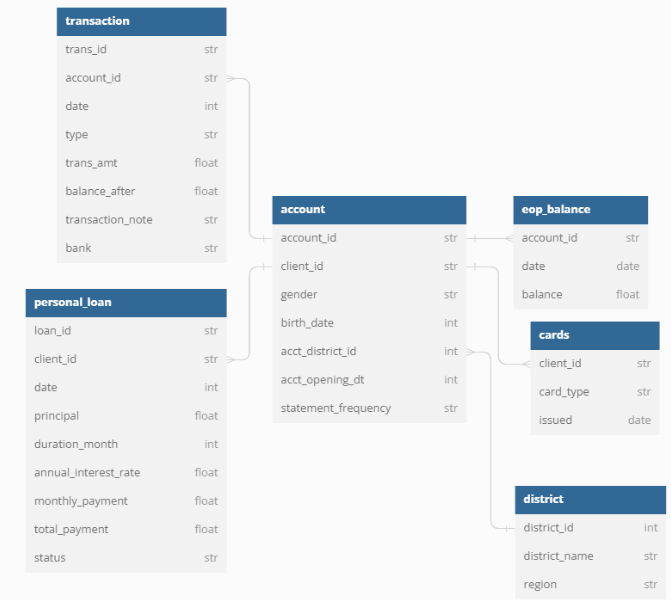

In [ ]:
# Merging all the data
account_master = account.merge(cards, how='left', left_on = 'client_id', right_on='client_id')
account_master = account_master.merge(district, how='left', left_on = 'acct_district_id', right_on='district_id')
account_master

,account_id,client_id,gender,birth_date,acct_district_id,acct_opening_dt,statement_frequency,card_type,issued,district_id,district_name,region
0,576,999692,F,19560111,55,130101,MONTHLY STATEMENT,NaN,NaN,55,Brno - venkov,south Moravia
1,3818,994601,M,19550402,74,130101,MONTHLY STATEMENT,NaN,NaN,74,Ostrava - mesto,north Moravia
2,704,999844,M,19650114,55,130101,MONTHLY STATEMENT,NaN,NaN,55,Brno - venkov,south Moravia
3,2378,992873,F,19950324,16,130101,MONTHLY STATEMENT,NaN,NaN,16,Jindrichuv Hradec,south Bohemia
4,2632,993177,M,19580812,24,130102,MONTHLY STATEMENT,NaN,NaN,24,Karlovy Vary,west Bohemia
...,...,...,...,...,...,...,...,...,...,...,...,...
4496,124,999149,M,19680627,55,171228,MONTHLY STATEMENT,NaN,NaN,55,Brno - venkov,south Moravia
4497,3958,994774,M,19710814,59,171228,MONTHLY STATEMENT,NaN,NaN,59,Kromeriz,south Moravia
4498,777,999929,F,19710911,30,171228,MONTHLY STATEMENT,classic,2018-08-30,30,Sokolov,west Bohemia
4499,1573,991906,M,19420707,63,171229,MONTHLY STATEMENT,NaN,NaN,63,Vyskov,south Moravia


In [ ]:
am = account_master[['account_id','client_id','gender','birth_date','acct_opening_dt','district_name','region','card_type']].copy()
am

,account_id,client_id,gender,birth_date,acct_opening_dt,district_name,region,card_type
0,576,999692,F,19560111,130101,Brno - venkov,south Moravia,NaN
1,3818,994601,M,19550402,130101,Ostrava - mesto,north Moravia,NaN
2,704,999844,M,19650114,130101,Brno - venkov,south Moravia,NaN
3,2378,992873,F,19950324,130101,Jindrichuv Hradec,south Bohemia,NaN
4,2632,993177,M,19580812,130102,Karlovy Vary,west Bohemia,NaN
...,...,...,...,...,...,...,...,...
4496,124,999149,M,19680627,171228,Brno - venkov,south Moravia,NaN
4497,3958,994774,M,19710814,171228,Kromeriz,south Moravia,NaN
4498,777,999929,F,19710911,171228,Sokolov,west Bohemia,classic
4499,1573,991906,M,19420707,171229,Vyskov,south Moravia,NaN


## Detect Data Kotor

In [ ]:
am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4501 entries, 0 to 4500
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   account_id       4501 non-null   int64 
 1   client_id        4501 non-null   int64 
 2   gender           4501 non-null   object
 3   birth_date       4501 non-null   int64 
 4   acct_opening_dt  4501 non-null   int64 
 5   district_name    4501 non-null   object
 6   region           4501 non-null   object
 7   card_type        931 non-null    object
dtypes: int64(4), object(4)
memory usage: 316.5+ KB


In [ ]:
for column_name in am.columns:
  print(column_name)
  print(am[column_name].value_counts())
  print('\n')

account_id
4296    2
576     1
6453    1
836     1
3192    1
       ..
3058    1
1958    1
1441    1
1109    1
3276    1
Name: account_id, Length: 4500, dtype: int64


client_id
999997    4
999994    3
999929    3
999914    3
999915    3
         ..
991749    1
991330    1
993062    1
991566    1
993965    1
Name: client_id, Length: 4383, dtype: int64


gender
M    2296
F    2205
Name: gender, dtype: int64


birth_date
19700926    5
19650204    5
19670909    4
19880827    4
19650924    4
           ..
19901225    1
19450524    1
19710526    1
19720621    1
19420707    1
Name: birth_date, Length: 3954, dtype: int64


acct_opening_dt
130208    13
131008    12
161124    11
160625    11
170808    10
          ..
141103     1
141104     1
141105     1
141106     1
150824     1
Name: acct_opening_dt, Length: 1535, dtype: int64


district_name
Hl.m. Praha        554
Karvina            152
Ostrava - mesto    135
Brno - mesto       128
Zlin                92
                  ... 
Semily       

In [ ]:
# Ringkas hasil df.isnull() dengan menggunakan fungsi .any(axis=...)
# Pilih axis='rows' atau axis=1
am.isnull().any(axis='rows')

account_id         False
client_id          False
gender             False
birth_date         False
acct_opening_dt    False
district_name      False
region             False
card_type           True
dtype: bool

In [ ]:
am[am['account_id'].duplicated()]

,account_id,client_id,gender,birth_date,acct_opening_dt,district_name,region,card_type
90,4296,995175,F,19690918,130128,Vyskov,south Moravia,classic


## Temuan Data Kotor
- Birth date belum menjadi format time series
- Ada account_id yang duplikat
- Ada card_type yang missing --> diisi dengan "No card"


## Data Cleaning

In [ ]:
am['birth_date'] = pd.to_datetime(am['birth_date'], format='%Y%m%d')
am['acct_opening_dt'] = pd.to_datetime(am['acct_opening_dt'], format='%y%m%d')
am

,account_id,client_id,gender,birth_date,acct_opening_dt,district_name,region,card_type
0,576,999692,F,1956-01-11,2013-01-01,Brno - venkov,south Moravia,NaN
1,3818,994601,M,1955-04-02,2013-01-01,Ostrava - mesto,north Moravia,NaN
2,704,999844,M,1965-01-14,2013-01-01,Brno - venkov,south Moravia,NaN
3,2378,992873,F,1995-03-24,2013-01-01,Jindrichuv Hradec,south Bohemia,NaN
4,2632,993177,M,1958-08-12,2013-01-02,Karlovy Vary,west Bohemia,NaN
...,...,...,...,...,...,...,...,...
4496,124,999149,M,1968-06-27,2017-12-28,Brno - venkov,south Moravia,NaN
4497,3958,994774,M,1971-08-14,2017-12-28,Kromeriz,south Moravia,NaN
4498,777,999929,F,1971-09-11,2017-12-28,Sokolov,west Bohemia,classic
4499,1573,991906,M,1942-07-07,2017-12-29,Vyskov,south Moravia,NaN


In [ ]:
am = am.drop_duplicates(subset=['account_id'])
am

,account_id,client_id,gender,birth_date,acct_opening_dt,district_name,region,card_type
0,576,999692,F,1956-01-11,2013-01-01,Brno - venkov,south Moravia,NaN
1,3818,994601,M,1955-04-02,2013-01-01,Ostrava - mesto,north Moravia,NaN
2,704,999844,M,1965-01-14,2013-01-01,Brno - venkov,south Moravia,NaN
3,2378,992873,F,1995-03-24,2013-01-01,Jindrichuv Hradec,south Bohemia,NaN
4,2632,993177,M,1958-08-12,2013-01-02,Karlovy Vary,west Bohemia,NaN
...,...,...,...,...,...,...,...,...
4496,124,999149,M,1968-06-27,2017-12-28,Brno - venkov,south Moravia,NaN
4497,3958,994774,M,1971-08-14,2017-12-28,Kromeriz,south Moravia,NaN
4498,777,999929,F,1971-09-11,2017-12-28,Sokolov,west Bohemia,classic
4499,1573,991906,M,1942-07-07,2017-12-29,Vyskov,south Moravia,NaN


In [ ]:
am['card_type'] = am['card_type'].fillna('no_card')
am

<ipython-input-69-bffc258eab0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am['card_type'] = am['card_type'].fillna('no_card')


,account_id,client_id,gender,birth_date,acct_opening_dt,district_name,region,card_type
0,576,999692,F,1956-01-11,2013-01-01,Brno - venkov,south Moravia,no_card
1,3818,994601,M,1955-04-02,2013-01-01,Ostrava - mesto,north Moravia,no_card
2,704,999844,M,1965-01-14,2013-01-01,Brno - venkov,south Moravia,no_card
3,2378,992873,F,1995-03-24,2013-01-01,Jindrichuv Hradec,south Bohemia,no_card
4,2632,993177,M,1958-08-12,2013-01-02,Karlovy Vary,west Bohemia,no_card
...,...,...,...,...,...,...,...,...
4496,124,999149,M,1968-06-27,2017-12-28,Brno - venkov,south Moravia,no_card
4497,3958,994774,M,1971-08-14,2017-12-28,Kromeriz,south Moravia,no_card
4498,777,999929,F,1971-09-11,2017-12-28,Sokolov,west Bohemia,classic
4499,1573,991906,M,1942-07-07,2017-12-29,Vyskov,south Moravia,no_card


In [ ]:
am['card_type'].value_counts()

no_card    3570
classic     689
junior      148
gold         93
Name: card_type, dtype: int64